#**Principal Component Analysis (PCA)**

##**What will you learn?**
1. **Introduction:** What is PCA?
2. **Advantages and Disadvantages of Dimensionality Reduction**
3. **PCA vs Linear Regression:** What is the difference?
4. **Applications of PCA**
5. **PCA on 2D Data**
6. **PCA on 3D Data**
7. **Analysis of Breast Cancer Dataset**
8. **Math Behind PCA:** Covariance Matrix, Eigen Values and SVD
10. **Self Implementation of PCA**
11. **How to select K (n_components):** How to select the correct number of components to retain?

##**Introduction**

Principal Component Analysis (PCA) is an unsupervised, non-parametric statistical technique primarily used for dimensionality reduction in machine learning.

Particularly, in this we transform variables into a new set of variables which are a linear combination of the original variables. These new set of variables are known as principal components.

**Dimensionality Reduction**: In many datasets there are often too many features based on which the conclusion is drawn. The higher the number of features, the harder it gets to visualize the training set and then work on it. Sometimes, most of these features are correlated, and hence redundant. It can be imagined that 2D data with linearly dependent features can be reduced to a single dimension. This is where dimensionality reduction algorithms come into play. 

Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.

It is the process of projection a space of large number of dimensions into less number of dimensions.

###**Advantages of Dimensionality Reduction**

1. It reduces the time and storage space required.

2. Removal of multi-collinearity improves the performance of the machine-learning model.

3. It becomes easier to visualize the data when reduced to very low dimensions such as 2D or 3D.

###**Disadvantages of Dimensionality Reduction**

1. It may lead to some amount of data loss.

2. It tends to find linear correlations between variables, which is sometimes undesirable.

3. It fails in cases where mean and covariance are not enough to define datasets.

4. We may not know how many principal components or dimensions should be kept. In practice, some thumb rules are applied.

##**PCA vs Linear Regression**

One might feel like we’re supposed to fit a line between multiple dimensions exploiting their linear dependence to obtain a single dimension just like linear regression, but it’s not true, linear regression and PCA are two separate things. Here in PCA we’re not trying to predict something on basis of a line. PCA is trying to find a lower dimension surface of line onto which it should project the data, so as to minimize the squared projection error. Square projection error is the perpendicular distance from principal vector, while in linear regression the SSE is the difference in y value (see diagram for clarity).

<img src = "https://files.codingninjas.in/3pca-7581.bmp">

##**Application of PCA**

1. **Data Compression:** Reducing the data from higher dimensions to fewer dimensions, thus saving space.

   If $x \in R_2 (2D) $ after compression $z \in R(1D)$

<img src="https://files.codingninjas.in/1pca-7565.bmp" width="800">

2. **Data visualization**: It becomes easier to visualize the data when reduced to very low dimensions such as 2D or 3D.

3. **Increase Speed and Performance**: Removal of multi-collinearity improves the performance of the machine-learning model.


##**PCA on 2D Data**

Here, we will use the scikit-learn PCA.
PCA takes 'n_components' as an argument which specifies the number of components we want after PCA. e.g. if we want our 3D data to be converted into 2D, then the number of components will be 2. 

For more details, you can refer to the documentation of PCA

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
x1 = np.array([1,2,3,4,5,6])
x2 = np.array([7.5, 11, 16, 18, 20, 26])

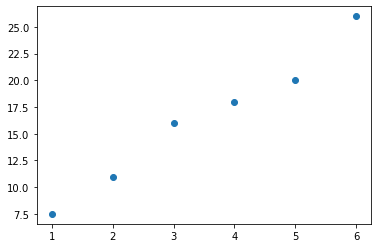

In [3]:
plt.scatter(x1, x2)
plt.show()

In [4]:
X = np.c_[x1, x2] #conversion of 2 lists into a 2D matrix
X

array([[ 1. ,  7.5],
       [ 2. , 11. ],
       [ 3. , 16. ],
       [ 4. , 18. ],
       [ 5. , 20. ],
       [ 6. , 26. ]])

In [5]:
pca = PCA(n_components = 1)
X_reduced = pca.fit_transform(X) #Convert the data from 2D to 1D. 

In [6]:
X_approx = pca.inverse_transform(X_reduced) #Getting back the original data
X_approx

array([[ 0.99070848,  7.50261555],
       [ 1.97703643, 11.00646421],
       [ 3.35460926, 15.90017805],
       [ 3.94969232, 18.01416153],
       [ 4.54477538, 20.12814502],
       [ 6.18317813, 25.94843564]])

Here, some information is lost as you can see from X and X_approx. 

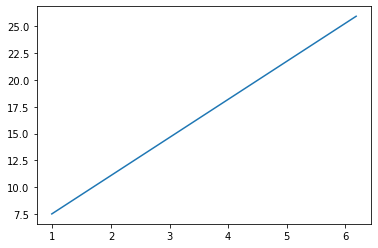

In [7]:
plt.plot(X_approx[:, 0], X_approx[:, 1])
plt.show()

##**PCA ON 3D Data**

Here, we will learn how to apply sckiti-learn PCA on a 3D data and convert the data into a 2D one.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [9]:
np.random.seed(2343243) #To generate same data no matter how many times we run this

In [10]:
mean_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1 = np.random.multivariate_normal(mean_vec1, cov_mat1, 100) #Using normal distribution to generate the data

In [11]:
mean_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2 = np.random.multivariate_normal(mean_vec2, cov_mat2, 100)

In [12]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, proj3d

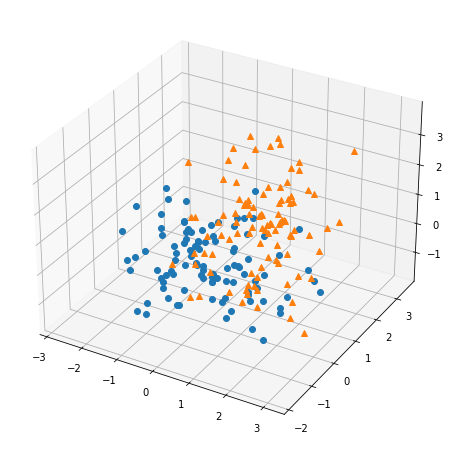

In [13]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
ax.plot(class1[:, 0], class1[:, 1], class1[:, 2], 'o')
ax.plot(class2[:, 0], class2[:, 1], class2[:, 2], '^')
plt.show()  #3D plot of the data

In [14]:
all_data = np.concatenate((class1, class2))

In [15]:
pca = PCA(n_components = 2) #converting 3D data into 2D
transformed_data = pca.fit_transform(all_data)
transformed_data

array([[-0.52351425, -0.63301617],
       [-0.78786184,  0.94206431],
       [-1.28725924,  0.54439067],
       [ 0.66747707,  1.69846274],
       [-1.74150174, -0.755306  ],
       [-1.03559449, -1.53950125],
       [-0.21765053, -0.85555712],
       [-0.7648506 , -0.46590375],
       [-0.64255217,  1.16920769],
       [-0.5783154 , -0.30888845],
       [ 0.25251683, -0.38101091],
       [-0.26298255, -0.44282938],
       [-0.86147962,  0.21339394],
       [-0.9917517 , -0.32293363],
       [-1.3133147 ,  0.01268907],
       [-1.09145198, -0.50248537],
       [-2.05840949, -1.13678107],
       [-0.62975084, -1.78591257],
       [-1.75005325, -1.27909834],
       [-0.66142546,  1.66188479],
       [-0.34624366,  0.47524286],
       [ 0.77989322,  0.76153114],
       [-0.22203858, -0.7362751 ],
       [-1.06469867,  0.33693758],
       [-1.93640401, -0.97234577],
       [-2.44237038, -0.34276504],
       [-1.7918403 ,  0.40615644],
       [ 0.33656537,  1.36869154],
       [-1.38894876,

In [16]:
pca.components_

array([[ 0.41124564,  0.64810013,  0.64097055],
       [ 0.91063567, -0.26106644, -0.32029202]])

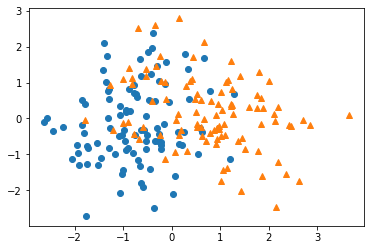

In [17]:
plt.plot(transformed_data[0:100,0],transformed_data[0:100,1],"o")
plt.plot(transformed_data[100:200,0],transformed_data[100:200,1],"^")
plt.show() #2D plot of the transformed data 

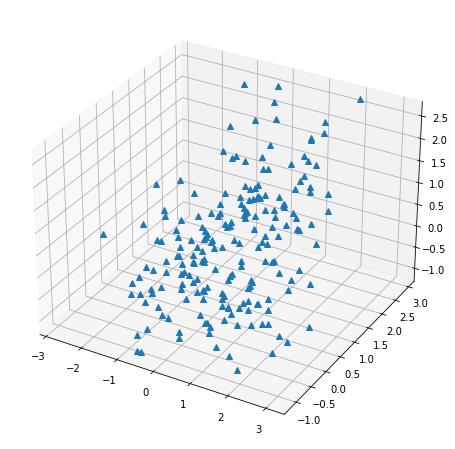

In [18]:
X_approx = pca.inverse_transform(transformed_data) #converting the 2D data back into 3D
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
ax.plot(X_approx[:, 0], X_approx[:, 1], X_approx[:, 2], '^')
plt.show()

##**Analysis on Breast Cancer Dataset**

To understand how well PCA works and how much it helps us, let's do analysis over a real dataset: Breast Cancer Dataset.

In [19]:
from sklearn import decomposition, ensemble, datasets, linear_model
import numpy as np
import time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [20]:
breast_cancer = datasets.load_breast_cancer()

In [21]:
X = breast_cancer.data
X.shape

(569, 30)

In [22]:
sc = StandardScaler()
X_std = sc.fit_transform(X)

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X_std, breast_cancer.target, random_state = 0)

In [24]:
pca = decomposition.PCA(n_components = 15)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [25]:
lr = linear_model.LogisticRegression()
start = time.time()
lr.fit(x_train, y_train)
ending = time.time()
print("Time Taken:", ending - start)
print("Score:", lr.score(x_test, y_test))

Time Taken: 0.06800580024719238
Score: 0.965034965034965


In [26]:
lr = linear_model.LogisticRegression()
start = time.time()
lr.fit(x_train_pca, y_train)
ending = time.time()
print("Time Taken : ", ending - start)
print("Score : ", lr.score(x_test_pca, y_test))

Time Taken :  0.06800127029418945
Score :  0.958041958041958


It is seen that with original data we achieve a score of 0.9650 in 0.026 seconds.

When we use the data whose dimensionality is reduced, we achieve a score of 0.9580 in 0.011 seconds.

So, with not much difference in the score, we save a lot of time in computation for datasets much larger than this.

##**Math Behind PCA**

PCA requires the direction in which the data changes the maximum (variance is maximum).

For this, we require the 
1. Covariance Matrix
2. Eigen Values and Eigen Vectors: We use SVD (Single Value Decomposition)

SVD is performed on the covariance matrix and we get a set of eigen vectors.
These vectors will be unit vectors in original space.

The **first eigenvector** will be the vector which explains the variance to the maximum (in best manner), the **second eigenvector** is the unit vector which explains the variance in the second best manner, and so on.

Eigenvalues represent the value by which a particular direction contains the information.


##**Self implementation of PCA**

Let's write our own code for PCA. We will follow certain steps while writing it:
1. Data pre-processing: Feature scaling / mean normalisation should always be performed
2. Calculation of covariance matrix
3. Find eigenvalues and eigenvectors corresponding to covariance matrix
4. Select top k eigen vectors which would account for most of the variance in data
5. Transform the original dataset with respect to these eigen vectors 
   


In [27]:
import numpy as np
np.random.seed(2343243)

In [54]:
mean_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1 = np.random.multivariate_normal(mean_vec1, cov_mat1, 20)  #Class 1
class1

array([[ 1.10843467, -0.78356327, -0.81736995],
       [-0.44834555, -1.0610789 , -0.2072099 ],
       [-0.72833733, -0.07979574, -1.61439639],
       [-1.57474136,  1.49728085, -0.09624937],
       [-2.00871388,  1.46577316,  0.54045893],
       [ 2.13107449,  1.72774921, -1.37005841],
       [-0.17691185, -0.43484172,  1.4193188 ],
       [ 0.82360627, -0.94013674,  0.53372157],
       [ 0.19343327, -1.36508766, -0.31403223],
       [-0.95390791, -0.36506936,  1.60092234],
       [-0.9530241 ,  0.66857755,  1.35588115],
       [-0.17168083,  1.73703942, -1.31575756],
       [-0.33944396,  0.41940313, -0.86522659],
       [-0.5564867 , -1.63570849, -0.6921115 ],
       [-0.29748052,  2.60791675, -0.28926645],
       [-0.78218718,  0.76661592, -0.18375176],
       [-0.23281462,  0.72807497,  0.38214275],
       [-1.3114994 ,  1.07192096, -0.48334392],
       [ 1.24943432,  0.63278444, -0.34035846],
       [-0.40923374,  0.26708236, -0.28946818]])

In [57]:
mean_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2 = np.random.multivariate_normal(mean_vec2, cov_mat2, 20)  #Class 2
class2

array([[-0.04514585,  0.16690483,  0.81755997],
       [ 0.41721368,  1.07111626,  2.74021481],
       [ 1.30822288,  0.33017189,  0.9633506 ],
       [ 1.43802106,  0.96961705,  1.90268396],
       [ 1.08763659,  1.90531426, -0.57187574],
       [-0.23830093,  1.17572726,  0.77259119],
       [ 3.12311618, -1.20550575,  0.7598276 ],
       [ 1.306199  ,  0.23229036, -0.09680751],
       [-0.22809139, -0.11061185,  0.37013735],
       [ 0.49505785, -0.05615648,  1.19209755],
       [ 1.08413977,  1.54810404,  1.93163184],
       [ 1.84855553,  0.8368439 ,  1.04286697],
       [-0.40235596,  1.43224266,  1.7625388 ],
       [-0.60881286,  0.33839387,  1.13740633],
       [ 1.31038247,  1.6810494 ,  2.55034035],
       [ 1.5608998 ,  0.64140463,  0.25823883],
       [ 1.92044621,  0.66489063,  1.21949881],
       [ 0.09053281,  2.73510409, -0.41598224],
       [ 0.88771299,  1.50699829,  0.64569125],
       [ 1.2202524 ,  0.79469824,  1.21586998]])

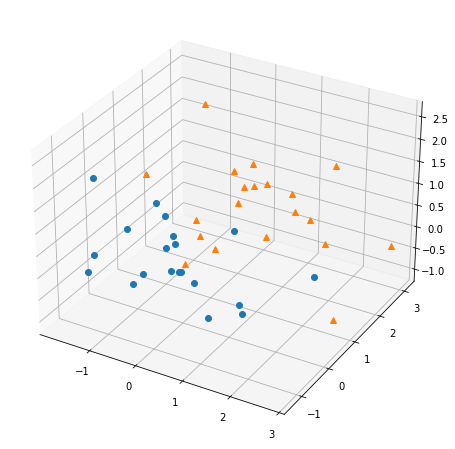

In [30]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
ax.plot(class1[:, 0], class1[:, 1], class1[:, 2], 'o')
ax.plot(class2[:, 0], class2[:, 1], class2[:, 2], '^')
plt.show()

In [31]:
all_data = np.concatenate((class1, class2))
all_data.shape

(40, 3)

In [32]:
all_data.mean(axis = 0)

array([0.4560612 , 0.47118588, 0.64109922])

In [33]:
all_data = all_data.T

In [34]:
cov_mat = np.cov(all_data)    # Calculation of co-variance matrix
cov_mat       

array([[1.48156581, 0.43272336, 0.00832651],
       [0.43272336, 1.06868385, 0.09154185],
       [0.00832651, 0.09154185, 0.77659054]])

In [35]:
eig_val, eig_vec = np.linalg.eig(cov_mat)      # Calculation of eigen values and eigen vectors 
eig_val, eig_vec, eig_vec[:,0]                 # i-th column from eig_vec contains eigen vector for i-th element in eig_val

(array([1.75777104, 0.8582392 , 0.71082995]),
 array([[-0.84204244, -0.43906668,  0.31334482],
        [-0.5363712 ,  0.61995098, -0.57268378],
        [-0.05718794,  0.65029319,  0.75752776]]),
 array([-0.84204244, -0.5363712 , -0.05718794]))

In [36]:
eig_val_vec_pairs = []
for i in range(len(eig_val)):
    eig_vector = eig_vec[:,i]
    eig_val_vec_pairs.append((eig_val[i], eig_vector))   
eig_val_vec_pairs.sort(reverse = True)                   ## selecting top-2 most important eigen values with most explained variance                       
matrix_eig = np.array([eig_val_vec_pairs[0][1],eig_val_vec_pairs[1][1]]) 
matrix_eig

array([[-0.84204244, -0.5363712 , -0.05718794],
       [-0.43906668,  0.61995098,  0.65029319]])

In [37]:
eig_val_vec_pairs

[(1.7577710419235262, array([-0.84204244, -0.5363712 , -0.05718794])),
 (0.8582391965561241, array([-0.43906668,  0.61995098,  0.65029319])),
 (0.7108299538825635, array([ 0.31334482, -0.57268378,  0.75752776]))]

In [38]:
transformed = matrix_eig.dot(all_data)    #Transforming data into 2D 
transformed = transformed.T
transformed.shape

(40, 2)

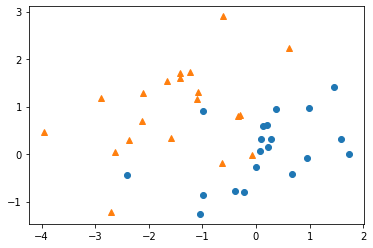

In [39]:
plt.plot(transformed[0:20, 0], transformed[0:20, 1], 'o')
plt.plot(transformed[20:40, 0], transformed[20:40, 1], '^')

plt.show()

**Let's see how the inbuilt PCA performs on the same data**

In [40]:
from sklearn.decomposition import PCA

In [41]:
pca = PCA(n_components =2)
skl_transformed = pca.fit_transform(all_data.T)

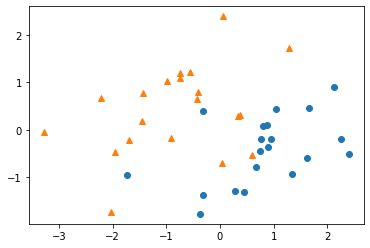

In [42]:
skl_transformed[:, 0] *= -1
plt.plot(skl_transformed[0:20, 0], skl_transformed[0:20, 1], 'o')
plt.plot(skl_transformed[20:40, 0], skl_transformed[20:40, 1], '^')

plt.show()

From the graphs, it is clear that we get a similar result. We may also look into the eigenvalues and eigenvectors using the following code.

In [43]:
pca.components_    #Inbuilt PCA

array([[ 0.84204244,  0.5363712 ,  0.05718794],
       [-0.43906668,  0.61995098,  0.65029319]])

In [44]:
pca.explained_variance_     #Inbuilt PCA

array([1.75777104, 0.8582392 ])

In [45]:
eig_val_vec_pairs       #Our implementation

[(1.7577710419235262, array([-0.84204244, -0.5363712 , -0.05718794])),
 (0.8582391965561241, array([-0.43906668,  0.61995098,  0.65029319])),
 (0.7108299538825635, array([ 0.31334482, -0.57268378,  0.75752776]))]

It is seen that we get the same results. Although in the above example, the direction of first eigen vector is taken negative by the inbuilt PCA.

##**How to select K (n_components)**




Value of k is directly proportional to variance explained by data, thus selecting an optimal value of k is very imporatant. Our primary objective should be to select a k small enough to explain maximum variance in the transformed data and then transforming the data into k dimensions.

The concept to find the optimal k is pretty straightforward.

First, we apply PCA without any value of n_components. This means that after applying PCA, we are left with the same number of components as before. But now, we have the explained variances of all the components.

The sum of these varirances is the total variance of the data.


Suppose we decide to maintain 3 features after applying PCA. The sum of variances of these 3 features divided by the total variance will give us the percentage of variance we maintain.

Hence, using the explained variances, we may decide the percentage of variance we want to retain.

Let's see the implementation of this in the code we wrote for the Breast Cancer Dataset.

In [46]:
from sklearn import decomposition, ensemble, datasets, linear_model
import numpy as np
import time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [47]:
breast_cancer = datasets.load_breast_cancer()

In [48]:
X = breast_cancer.data
X.shape

(569, 30)

In [49]:
sc = StandardScaler()
X_std = sc.fit_transform(X)

In [50]:
x_train, x_test, y_train, y_test = train_test_split(X_std, breast_cancer.target, random_state = 0)

In [51]:
pca = decomposition.PCA()
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [52]:
total = sum(pca.explained_variance_)
k = 0
current_variance = 0
while current_variance/total < 0.99:
  current_variance += pca.explained_variance_[k]
  k = k + 1

k

17

This means that to maintain 99% variance, we need just 17 components.

In [53]:
total = sum(pca.explained_variance_)
k = 0
current_variance = 0
while current_variance/total < 0.95:
  current_variance += pca.explained_variance_[k]
  k = k + 1

k

10

Similariy, to maintain 95% variance, we need just 10 components.

Now, you need not hardcode the amount of components you need to keep. All you need to do is decide the amount of variance that you want to maintain and find out the value of k accordingly.